## Question 1: Implement UCS Algorithm

In [12]:
import time
import networkx as nx
import matplotlib.pyplot as plt

In [13]:
edges = [
    (1,2,2), (1,5,1), (2,3,1), (2,6,3), (3,4,2), (4,8,1), (5,9,1), (6,5,5), (6,7,1), (6,10,4), (7,11,10), (8,7,5), 
    (8,12,15), (9,10,8), (10,11,3), (11,12,1), (7,3,4)
]

In [14]:
def build_graph(edge_list):
    graph = {}
    for u, v, w in edge_list:
        graph.setdefault(u, []).append((v, w))
        graph.setdefault(v, []).append((u, w))
    return graph

In [15]:
def draw_graph_with_path(edges, path, title):
    G = nx.Graph()
    G.add_weighted_edges_from(edges)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
    edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    if path:
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color="r", width=2)
    plt.title(title)
    plt.show()

In [18]:
import heapq

def ucs(graph, start, goal):
    queue = [(0, start, [start])]
    visited = set()
    while queue:
        cost, node, path = heapq.heappop(queue)
        if node in visited:
            continue
        visited.add(node)
        if node == goal:
            return path, cost
        for neighbor, weight in graph.get(node, []):
            if neighbor not in visited:
                heapq.heappush(queue, (cost + weight, neighbor, path + [neighbor]))
    return None, float('inf')

Path: [1, 2, 6, 10, 11, 12], Cost: 13


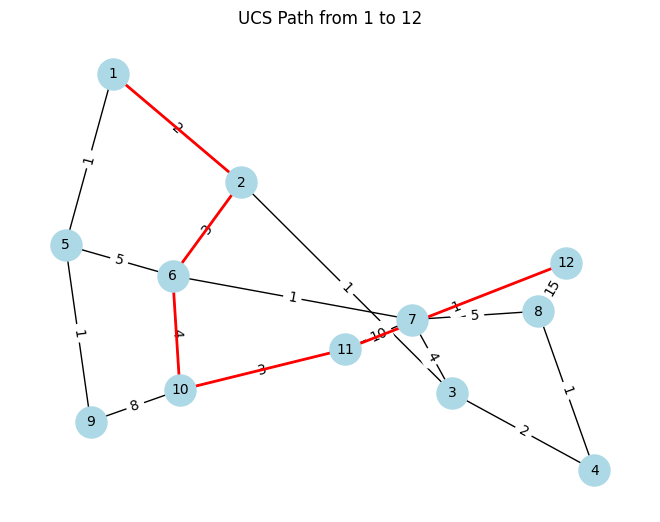

In [19]:
graph = build_graph(edges)

path, cost = ucs(graph, 1, 12)
print(f"Path: {path}, Cost: {cost}")

draw_graph_with_path(edges, path, "UCS Path from 1 to 12")